In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8MB 24kB/s 


In [ ]:
!pip install fastai

In [ ]:
import fastai
from fastai import *
from fastai.text import *
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [ ]:
path = "/content/drive/My Drive/MLDM/train.json"
df = pd.read_json(path)

In [ ]:
path = "/content/drive/My Drive/MLDM/train_label.csv"
label = pd.read_csv(path)

In [ ]:
dtf = pd.merge(label, df, on="Id", sort = False)
dtf.drop(labels = 'gender', axis = 1, inplace=True)

In [ ]:
dtf.drop(labels = 'Id', axis = 1, inplace=True)


In [ ]:
dtf

,Category,description
0,19,She is also a Ronald D. Asmus Policy Entrepre...
1,9,He is a member of the AICPA and WICPA. Brent ...
2,19,Dr. Aster has held teaching and research posi...
3,24,He runs a boutique design studio attending cl...
4,24,"He focuses on cloud security, identity and ac..."
...,...,...
217192,19,A member of the UWA Cultural Collections Boar...
217193,22,Kelly has worked globally leading teams of co...
217194,19,He's the lead author of a recent study that f...
217195,19,She specializes in the theoretical and pedago...


In [ ]:
path = "/content/drive/My Drive/MLDM/test.json"
test_data = pd.read_json(path)

In [ ]:
Test = test_data['description']
print(Test)

3          She currently works on CNN’s newest primetime...
6          Lavalette’s photographs have been shown widel...
11         Along with his academic and professional deve...
17         She obtained her Ph.D. in Islamic Studies at ...
18         She studies issues of women and Islam and has...
                                ...                        
271476     Prior to that, she worked as a Research Staff...
271477     The group’s antics began when they switched t...
271482     Formerly, she was the Coordinator for Music E...
271485     She started her law practice at Morris Mannin...
271486     Since 1995, he works as a programme maker and...
Name: description, Length: 54300, dtype: object


In [ ]:
dtf['description'] = dtf['description'].str.replace("[^a-zA-Z]", " ")
print(dtf['description'])

0          She is also a Ronald D  Asmus Policy Entrepre...
1          He is a member of the AICPA and WICPA  Brent ...
2          Dr  Aster has held teaching and research posi...
3          He runs a boutique design studio attending cl...
4          He focuses on cloud security  identity and ac...
                                ...                        
217192     A member of the UWA Cultural Collections Boar...
217193     Kelly has worked globally leading teams of co...
217194     He s the lead author of a recent study that f...
217195     She specializes in the theoretical and pedago...
217196     Since she was    years old she has become a m...
Name: description, Length: 217197, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation set
df_trn, df_val = train_test_split(dtf, stratify = dtf['Category'], test_size = 0.4, random_state = 12)

In [ ]:
df_trn.shape, df_val.shape

((130318, 2), (86879, 2))

In [ ]:
df_val

,Category,description
94619,19,His music has been performed by the Ethos Col...
183178,12,For example once some fans called her name a...
213529,11,He practices in Los Angeles California and h...
157131,11,She had worked in different hospitals as medi...
183903,2,Vedic chant teacher formed by the KYM Seven ...
...,...,...
19590,20,Raab is interested in how these communities h...
51215,26,She then goes on a personal vendetta against ...
25475,14,Steve is the owner of Revive Therapy in Sacra...
191287,19,He held a similar position at the University ...


In [ ]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val,  path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
xxbos xxmaj he earned his m f a from xxmaj yale xxmaj university xxmaj school of xxmaj art and his b f a from the xxmaj university of xxmaj illinois xxmaj chicago xxmaj his work has been exhibited internationally at p s xxup ny the xxmaj studio xxmaj museum in xxmaj harlem xxup ny xxmaj xxunk xxmaj xxunk xxmaj art xxmaj museum xxmaj slovak xxmaj republic xxmaj honor xxmaj fraser,5
xxbos xxmaj she received a j d from the xxmaj university of xxmaj denver xxmaj sturm xxmaj college of xxmaj law xxmaj while there she served as xxmaj editor in xxmaj chief of the xxmaj denver xxmaj journal of xxmaj international xxmaj law and xxmaj policy captain of the xxmaj jessup moot court team and president of the xxmaj international xxmaj law xxmaj society xxmaj she earned an m a,26
xxbos xxmaj before coming to xxmaj bowie she taught at xxmaj del xxmaj valle xxmaj high xxmaj school for seven years xxmaj she currently teaches xxmaj world xxmaj literature and xxmaj creative xxmaj writing xxmaj before becoming a teacher she was a music journalist for ten years in xxmaj boston xxup ma xxmaj she holds an xxup mfa from the xxmaj writing xxmaj seminars at xxmaj bennington xxmaj college and,3
xxbos xxmaj his work is published xxunk xxmaj york xxmaj times xxmaj magazine xxmaj new xxmaj york xxmaj magazine xxmaj fortune xxmaj magazine xxmaj time xxmaj magazine xxup espn the xxmaj magazine xxmaj geo xxmaj magazine and many other national and international publications xxmaj he has received several awards including the xxmaj eugene xxmaj smith support grant for his work on revolving door alcoholics xxmaj he has been in numerous,20
xxbos xxmaj he has received commissions from the xxmaj xxunk xxmaj dortmund xxmaj staatstheater xxmaj kassel xxmaj boston xxmaj lyric xxmaj opera and the xxmaj president of xxmaj harvard xxmaj university xxmaj he has written works for xxmaj mark xxmaj knoop xxmaj marilyn xxmaj nonken xxmaj wolfram xxmaj rieger xxmaj carl xxmaj xxunk xxmaj serge xxmaj xxunk xxmaj clive xxmaj xxunk xxmaj smith the xxmaj chiara xxmaj string xxmaj quartet,25


In [ ]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.4)

In [ ]:
# train the learner object
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.487826,3.293960,0.418232,19:25


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 8.32E-07


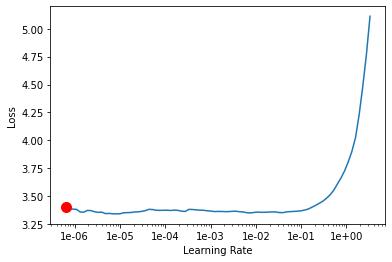

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,3.332099,3.293852,0.418247,19:35
1,3.348570,3.293817,0.418245,19:35


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.090416,3.038285,0.447729,21:46
1,2.946116,2.968225,0.457335,21:52


In [ ]:
learn.predict("She is", n_words=10)

'She is also the coordinator of the Scientific Research and'

In [ ]:
learn.save_encoder('ft_enc')

**using the language model to train the classifier**


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (130318 items)
x: TextList
xxbos xxmaj she works with xxmaj colta xxmaj kommersant and xxmaj radio xxmaj mel xxmaj mikhail xxmaj sokolov is xxmaj professor of xxmaj political xxmaj science and xxmaj sociology at xxmaj european xxmaj university in xxmaj st xxmaj petersburg,xxbos xxmaj she was born on xxmaj january xxmaj she is listed on freeones since and is currently ranked th place xxmaj she currently has gallery links in her own freeones section,xxbos xxmaj he has with him years of diversified experience working with various companies of which he has served the e p companies for years including xxmaj pakistan xxmaj oil xxmaj fields xxmaj limited and orient xxmaj petroleum xxmaj limited xxmaj during his professional life he achieved various targets including the implementation of xxmaj entrepreneur xxmaj resource xxmaj program and arranged finances for various capital projects,xxbos xxmaj he has been a visiting scientist at the xxma

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-01
Min loss divided by 10: 3.02E-02


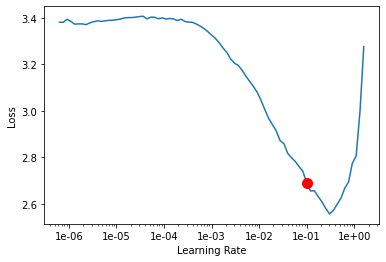

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.196463,1.118776,0.668194,06:00
1,0.895457,0.867282,0.774134,05:32


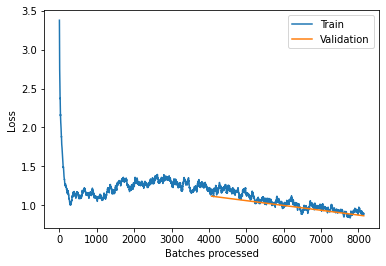

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(4, slice(5e-3, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.792529,1.288394,0.784413,06:39
1,0.685690,1.285408,0.806651,06:34
2,0.678658,0.747397,0.819899,06:18
3,0.665191,3.450206,0.816354,06:46


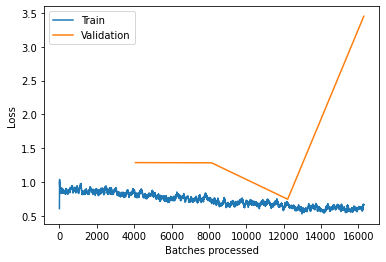

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.643718,2.797549,0.823720,11:53
1,0.575586,0.641222,0.828543,13:30
2,0.499747,2.244975,0.828578,13:08
3,0.429506,0.631445,0.831778,12:59


In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)

In [ ]:
learn.export('modelfastai.pkl')

In [ ]:
y

tensor([19, 12, 11,  ..., 14, 19,  1])

In [ ]:
losses

tensor([3.4491e+00, 2.5104e+00, 3.6579e-04,  ..., 4.1937e+00, 1.1253e-04,
        1.7881e-06])

In [ ]:
learn.data.add_test(test_data['description'])


In [ ]:
prob_preds = learn.get_preds(ds_type=DatasetType.Test, ordered=True, with_loss=True)

In [ ]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)
result = preds.numpy()[:, 0]

In [ ]:
testlabels = np.argmax(preds, 1)

In [ ]:
test_data['description']

3          She currently works on CNN’s newest primetime...
6          Lavalette’s photographs have been shown widel...
11         Along with his academic and professional deve...
17         She obtained her Ph.D. in Islamic Studies at ...
18         She studies issues of women and Islam and has...
                                ...                        
271476     Prior to that, she worked as a Research Staff...
271477     The group’s antics began when they switched t...
271482     Formerly, she was the Coordinator for Music E...
271485     She started her law practice at Morris Mannin...
271486     Since 1995, he works as a programme maker and...
Name: description, Length: 54300, dtype: object

In [ ]:
testlabels

tensor([ 6, 20, 19,  ..., 19, 26, 15])

In [ ]:
dfpred = pd.DataFrame(testlabels)

In [ ]:
dfpred.to_csv('testsubmis.csv',sep = ';',header = ['Category'])